<a href="https://colab.research.google.com/github/rishiyangala/dog_breed_classification/blob/main/dog_breed_clasification_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kagglew

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:

! kaggle competitions download -c dog-breed-identification

 98% 675M/691M [00:05<00:00, 118MB/s]
100% 691M/691M [00:05<00:00, 142MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dog-breed-identification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import pandas as pd
import os
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df = pd.read_csv("labels.csv")


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import pandas as pd
from PIL import Image
import os



# create a dictionary mapping image names to dog breeds
name_to_breed = dict(zip(df['id'], df['breed']))

# create a new folder to save the labeled images
output_folder = 'labeled_images/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# iterate through the images in the folder
input_folder = 'train/'
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        # get the dog breed label for the image
        dog_breed = name_to_breed[filename.split('.')[0]]
        # open the image file
        img = Image.open(os.path.join(input_folder, filename))
        # save the image file with the dog breed label in the filename
        output_filename = f"{dog_breed}_{filename}"
        ap=str(dog_breed)
        op=output_folder+'/'+ap+'/'
        if not os.path.exists(op):
             os.makedirs(op)
        img.save(os.path.join(op, output_filename))

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_ds = train_datagen.flow_from_directory(
  directory= 'labeled_images',
    target_size=(311, 311),
    batch_size=32,seed=42,shuffle=True,
    class_mode='categorical',
    subset='training')
validation_ds = train_datagen.flow_from_directory(
  directory= 'labeled_images',
    target_size=(311, 311),
    batch_size=32,seed=42,shuffle=True,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator (
    rescale=1./255.
)

test_set = test_datagen.flow_from_directory (
    '',
    shuffle=False,
    target_size = (311,311),
    batch_size = 32,
    classes=['test']
)


Found 8221 images belonging to 120 classes.
Found 2001 images belonging to 120 classes.
Found 10357 images belonging to 1 classes.


In [ ]:
from keras.models import load_model
model.load_weights("/model-02-0.8661.hdf5")

In [ ]:
# callbacks that will be used during training
# importing required libraries, modules and pretrained model

import os
import tensorflow as tf
from tensorflow import keras
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception


SEED = 42
SIZE = (311, 311)
BATCH_SIZE = 32
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=10)
checkpoint=ModelCheckpoint(
    filepath=model_filepath,moniter='val_loss',mode='min',save_best_only=True,
    verbose=1
)

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(311, 311, 3)))
for layer in base_model.layers:
    layer.trainable = False
head_model = AveragePooling2D(pool_size=(4, 4))(base_model.output)
head_model = Flatten(name='flatten')(head_model)
head_model = Dense(1024, activation='relu')(head_model)
head_model = Dropout(0.3)(head_model)
head_model = Dense(512, activation='relu')(head_model)
head_model = Dropout(0.3)(head_model)
head_model = Dense(120, activation='softmax')(head_model)
model = Model(inputs=base_model.input, outputs=head_model)
optimizer = 'adam'
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception

SEED = 42
SIZE = (311, 311)
BATCH_SIZE = 32
early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=10)
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath='/model-{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint=ModelCheckpoint(
    filepath=model_filepath,moniter='val_loss',mode='min',save_best_only=True,
    verbose=1
)

In [ ]:
base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(311, 311, 3)))

base_model.summary()

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
head_model = AveragePooling2D(pool_size=(4, 4))(base_model.output)
head_model = Flatten(name='flatten')(head_model)
head_model = Dense(1024, activation='relu')(head_model)
head_model = Dropout(0.3)(head_model)
head_model = Dense(512, activation='relu')(head_model)
head_model = Dropout(0.3)(head_model)
head_model = Dense(120, activation='softmax')(head_model)

In [ ]:
model = Model(inputs=base_model.input, outputs=head_model)
optimizer = 'adam'
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds,callbacks=[checkpoint])


Epoch 1/5
257/257 [==============================] - ETA: 0s - loss: 1.0229 - accuracy: 0.7553
Epoch 1: val_loss improved from inf to 0.45755, saving model to /model-01-0.8716.hdf5
257/257 [==============================] - 265s 1s/step - loss: 1.0229 - accuracy: 0.7553 - val_loss: 0.4576 - val_accuracy: 0.8716
Epoch 2/5
257/257 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.8352
Epoch 2: val_loss did not improve from 0.45755
257/257 [==============================] - 260s 1s/step - loss: 0.6291 - accuracy: 0.8352 - val_loss: 0.4700 - val_accuracy: 0.8741
Epoch 3/5
257/257 [==============================] - ETA: 0s - loss: 0.5652 - accuracy: 0.8471
Epoch 3: val_loss improved from 0.45755 to 0.45617, saving model to /model-03-0.8681.hdf5
257/257 [==============================] - 260s 1s/step - loss: 0.5652 - accuracy: 0.8471 - val_loss: 0.4562 - val_accuracy: 0.8681
Epoch 4/5
257/257 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.8593
E

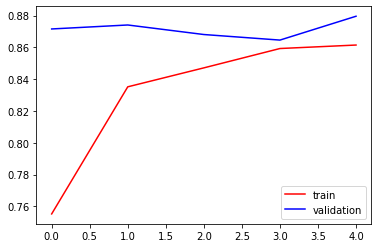

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
y=model.predict(test_set)

324/324 [==============================] - 107s 329ms/step


In [ ]:
df_sub = pd.read_csv('sample_submission.csv')
df_sub.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [ ]:
z=[]
for i in range(120):
  z.append(0)

for i in range(len(df_sub)):
   df_sub.iloc[i,1:]=z
   df_sub.iloc[i,v[i]]=1
#df_sub.iloc[:,1:] = y
#df_sub.head()

In [ ]:
y.shape

(10357, 120)

In [ ]:
v=[]
for x in range(len(y)):
  v.append(np.argmax(y[x]+1))

In [ ]:
print(colnames(df_sub)[max.col(df_sub)])

In [ ]:
final_df = df_sub.set_index('id')
final_df.to_csv('final10.csv')

In [ ]:
for x in range(len(v)):
   v[x]+=1;

In [ ]:
v[70]

1

In [ ]:
maxValueIndexObj = final_df.idxmax(axis=1)
print("Max values of row are at following columns :")

Max values of row are at following columns :


In [ ]:
target, dog_breeds = pd.factorize(df['breed'], sort = True)
df['target'] = target

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(predictions.shape)
print(predictions)

(10357, 120)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 6.4558416e-17]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
submission=pd.read_csv('sample_submission.csv')
submission.loc[:, dog_breeds] = predictions
submission.to_csv('dogbreed.csv', index=False)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)


    for ix,img_dir in enumerate(tqdm(test_filenames)):
        img = load_img(img_dir, target_size = img_size)
        images[ix]=img
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test('/kaggle/input/dog-breed-identification/test/', img_size)

In [ ]:

# Import the necessary libraries
from PIL import Image
from numpy import asarray


# load the image and convert into
# numpy array
img = Image.open('/content/test/000621fb3cbb32d8935728e48679680e.jpg')

# asarray() class is used to convert
# PIL images into NumPy arrays
x = asarray(img)

In [ ]:
v=y[0];


In [ ]:
res.shape

(1, 311, 311, 3)

In [ ]:
res = res[np.newaxis,...]

In [ ]:
y=model.predict(res)


1/1 [==============================] - 0s 52ms/step


In [ ]:
np.argmax(y)

In [ ]:
submission=pd.read_csv('sample_submission.csv')
#submission.loc[:, dog_breeds] = predictions
#submission.to_csv('dogbreed.csv', index=False)

In [ ]:
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [ ]:
breeds=df['breed'].unique()

In [ ]:
breeds.sort()

In [ ]:
breeds

In [ ]:
p=0
for i in breeds:
   submission.loc[0, i]=v[p]
   p=p+1

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/test/00b43aa6064fa6733a391d41fe4c6803.jpg')
res = cv2.resize(img, dsize=(311,311), interpolation=cv2.INTER_CUBIC)

In [ ]:
res = res[np.newaxis,...]
res.shape
res = res/255
z=model.predict(res)

1/1 [==============================] - 0s 57ms/step


In [ ]:
z

array([[1.4014319e-06, 2.1261274e-05, 5.3433328e-06, 1.3244982e-05,
        6.0283513e-05, 1.3453914e-04, 1.0111247e-06, 4.7561875e-07,
        4.9074413e-05, 1.6222791e-04, 8.1944108e-06, 2.4233434e-05,
        2.6646563e-05, 6.9068310e-06, 1.9622197e-05, 2.4159421e-04,
        2.2969021e-05, 7.2329212e-06, 3.0620274e-06, 3.2384883e-06,
        3.4745564e-04, 2.2564113e-06, 2.2380384e-06, 1.0176797e-06,
        1.5038484e-03, 2.2882623e-06, 4.7736783e-05, 5.7411980e-06,
        1.9157332e-04, 2.7125914e-06, 2.2397968e-07, 2.4622629e-04,
        7.2063827e-05, 1.9826127e-04, 7.8311687e-06, 3.7937994e-06,
        3.7381548e-07, 3.8350213e-06, 7.7711375e-06, 6.3332432e-06,
        3.9729644e-02, 9.5326966e-01, 5.1688157e-06, 1.3443997e-06,
        3.3475852e-04, 8.0793291e-07, 7.0888211e-07, 9.3405991e-04,
        3.9540515e-05, 2.5670657e-05, 2.1487914e-04, 1.5552698e-04,
        1.2177018e-05, 1.8691926e-05, 1.7002920e-05, 8.6256132e-06,
        1.1300088e-04, 2.7260612e-06, 1.9006889e

In [ ]:
img= Image.open("/content/test/0041940322116ae58c38130f5a6f71f9.jpg")
img = img.resize((311,311))
img=np.array(img)

In [ ]:
img.shape

(311, 311, 3)

In [ ]:
for i in range(len(submission)):
  dir=submission.loc[i,'id']
  dir='/content/test/'+dir+'.jpg'
  img = cv2.imread(dir)
  res = cv2.resize(img, dsize=(311,311), interpolation=cv2.INTER_CUBIC)
  res = res[np.newaxis,...]
  y=model.predict(res)
  v=y[0]
  p=0
  for j in breeds:
   submission.loc[i, j]=v[p]
   p=p+1

In [ ]:
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00102ee9d8eb90812350685311fe5890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0012a730dfa437f5f3613fb75efcd4ce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001510bc8570bbeee98c8d80c8a95ec1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001a5f3114548acdefa3d4da05474c2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(submission)):
  dir=submission.loc[i,'id']
  dir='/content/test/'+dir+'.jpg'
  img= Image.open(dir)
  img = img.resize((311,311))
  res=np.array(img)
  res = res[np.newaxis,...]
  y=model.predict(res)
  v=y[0]
  p=0
  for j in breeds:
   submission.loc[i, j]=v[p]
   p=p+1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 56ms/step


In [ ]:
submission.to_csv('dogbreed.csv')